## Analyze results of ZSCG on Cifar10

### Results

Morover it has been seen that the success rate was fairly independent by the guassian smoothing parameter *v* and by the momentum *alpha* with good values respectively 0.001 and 0.2. For this reason the results are taken by changing the different level of *epsilon* and *n_gradient* (the upper bound of the norm and the number of function evaluation per step).

The maximum number of step has been set to 100.

**N.B**
1. All the results are taken in the *google colab enviroment* using the available GPU *Tesla K80*. <br>
2. The results are all taken with the torch random seed set as *42*. <br>
3. The results are tanken using 100 random sample. In case for target attack with high number of model call for the gradient evaluation (*n_gradient*) 50/20 random examples were used. Results taken with only 50/20 examples are indicated with * and ** respectively
4. In the *target* case all the images sampled are used in a target attack against all the other category. For this reason using a sample of 20 images means, in the case of *MNIST*, means performing 180 attacks. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**1. Untarget attack on Cifar10 with** $L_{\infty}$

In [6]:
CUI = pd.read_csv('CUI.csv', index_col=0)
print('MUI has shape: {}'.format(CUI.shape))
epsilon_list = list(CUI.Epsilon.unique())
print('The upper bounds on the norm are:\n{}'.format(epsilon_list))
n_gradient = sorted(list(CUI.NGradient.unique()))
CUI

MUI has shape: (19, 11)
The upper bounds on the norm are:
[0.02, 0.01, 0.005]


,Epsilon,Target,SuccesRate,MeanTime,MeanEpsilon,NGradient,BatchSize,Alpha,GaussianSmoothing,Nexample,Epochs
0,0.020,0,0.91,2.445847,0.010253,500,-1,0.2,0.001,100,100
1,0.020,0,0.91,2.430556,0.010253,500,-1,0.2,0.001,100,100
2,0.020,0,0.99,1.802999,0.008883,1000,-1,0.2,0.001,100,100
3,0.020,0,1.00,2.154792,0.007879,2000,-1,0.2,0.001,100,100
4,0.020,0,1.00,3.368314,0.007033,4000,-1,0.2,0.001,100,100
5,0.020,0,1.00,5.743082,0.006618,8000,4000,0.2,0.001,100,100
6,0.020,0,1.00,10.189762,0.006231,16000,4000,0.2,0.001,100,100
7,0.010,0,0.60,8.106542,0.006954,500,-1,0.2,0.001,100,100
8,0.010,0,0.76,11.186959,0.006328,1000,-1,0.2,0.001,100,100
9,0.010,0,0.84,14.618949,0.005778,2000,-1,0.2,0.001,100,100


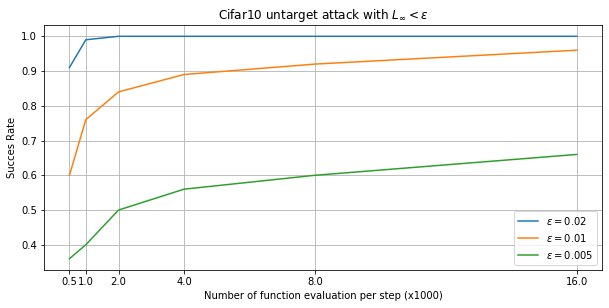

In [12]:
fig = plt.figure(figsize=(10, 4.5))
plt.title('Cifar10 untarget attack with $L_{\infty} < \epsilon$')
for eps in epsilon_list:
    c = CUI.Epsilon == eps
    plt.plot(CUI.NGradient[c], CUI.SuccesRate[c], label = r'$\epsilon = {}$'.format(eps))
plt.ylabel('Succes Rate')
plt.xlabel('Number of function evaluation per step (x1000)')
plt.xticks(n_gradient, np.array(n_gradient)/1000, rotation=0)
plt.legend()
plt.grid()
plt.show()

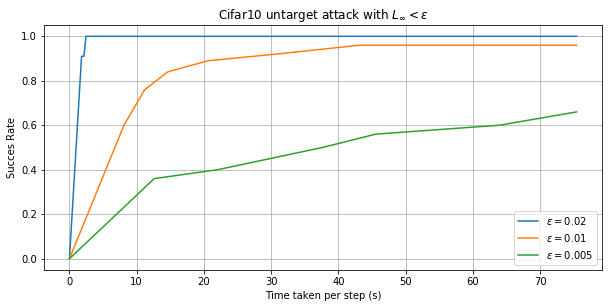

In [13]:
max_time = CUI.MeanTime.max()
def SR(df):
    return [0] + df.SuccesRate.tolist() + [df.SuccesRate.max()]
def Time(df):
    return sorted([0] + df.MeanTime.tolist() + [max_time])

fig = plt.figure(figsize=(10, 4.5))
plt.title('Cifar10 untarget attack with $L_{\infty} < \epsilon$')
for eps in epsilon_list:
    c = CUI.Epsilon == eps
    plt.plot(Time(CUI[c]), SR(CUI[c]), label = r'$\epsilon = {}$'.format(eps))
plt.ylabel('Succes Rate')
plt.xlabel('Time taken per step (s)')
plt.legend()
plt.grid()
plt.show()

**2. Target attack on Cifar10 with** $L_{\infty}$

In [25]:
CTI = pd.read_csv('CTI.csv', index_col=0)
print('MTI has shape: {}'.format(CTI.shape))
epsilon_list = list(CTI.Epsilon.unique())
print('The upper bounds on the norm are:\n{}'.format(epsilon_list))
n_gradient = sorted(list(CTI.NGradient.unique()))
CTI

MTI has shape: (14, 14)
The upper bounds on the norm are:
[0.01, 0.015, 0.02]


,Optim,Data,Norm,Epsilon,Target,SuccesRate,MeanTime,MeanEpsilon,NGradient,BatchSize,Alpha,GaussianSmoothing,Nexample,Epochs
0,classic,cifar10,-1,0.010,1,0.111111,6.773054,0.009522,500,-1,0.2,0.001,20,100
1,classic,cifar10,-1,0.010,1,0.183333,12.784816,0.009431,1000,-1,0.2,0.001,20,100
2,classic,cifar10,-1,0.010,1,0.272222,22.926947,0.009304,2000,-1,0.2,0.001,20,100
3,classic,cifar10,-1,0.010,1,0.427778,30.955472,0.009131,4000,-1,0.2,0.001,20,100
4,classic,cifar10,-1,0.010,1,0.527778,44.466680,0.008931,8000,4000,0.2,0.001,20,100
5,classic,cifar10,-1,0.015,1,0.261111,5.126995,0.013933,500,-1,0.2,0.001,20,100
6,classic,cifar10,-1,0.015,1,0.455556,7.462878,0.013576,1000,-1,0.2,0.001,20,100
7,classic,cifar10,-1,0.015,1,0.616667,11.001791,0.013096,2000,-1,0.2,0.001,20,100
8,classic,cifar10,-1,0.015,1,0.733333,17.097870,0.012555,4000,-1,0.2,0.001,20,100
9,classic,cifar10,-1,0.015,1,0.794444,25.419425,0.012171,8000,4000,0.2,0.001,20,100


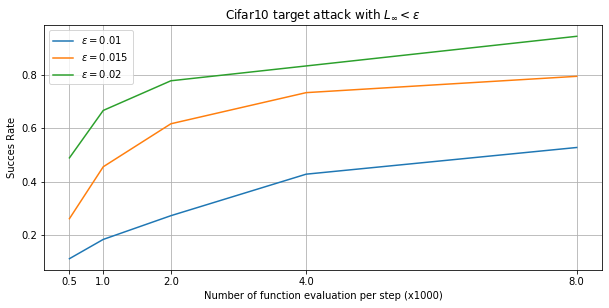

In [18]:
fig = plt.figure(figsize=(10, 4.5))
plt.title('Cifar10 target attack with $L_{\infty} < \epsilon$')
for eps in epsilon_list:
    c = CTI.Epsilon == eps
    plt.plot(CTI.NGradient[c], CTI.SuccesRate[c], label = r'$\epsilon = {}$'.format(eps))
plt.ylabel('Succes Rate')
plt.xlabel('Number of function evaluation per step (x1000)')
plt.xticks(n_gradient, np.array(n_gradient)/1000, rotation=0)
plt.legend()
plt.grid()
plt.show()

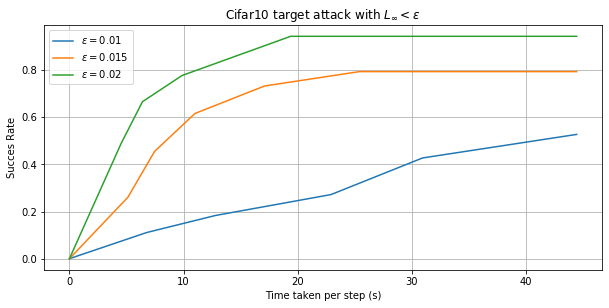

In [19]:
max_time = CTI.MeanTime.max()
def SR(df):
    return [0] + df.SuccesRate.tolist() + [df.SuccesRate.max()]
def Time(df):
    return [0] + df.MeanTime.tolist() + [max_time]

fig = plt.figure(figsize=(10, 4.5))
plt.title('Cifar10 target attack with $L_{\infty} < \epsilon$')
for eps in epsilon_list:
    c = CTI.Epsilon == eps
    plt.plot(Time(CTI[c]), SR(CTI[c]), label = r'$\epsilon = {}$'.format(eps))
plt.ylabel('Succes Rate')
plt.xlabel('Time taken per step (s)')
plt.legend()
plt.grid()
plt.show()

**3. Untarget attack on Cifar10 with L2**

In [7]:
CU2 = pd.read_csv('CU2.csv', index_col=0)
print('MU2 has shape: {}'.format(CU2.shape))
epsilon_list = list(CU2.Epsilon.unique())
print('The upper bounds on the norm are:\n{}'.format(epsilon_list))
n_gradient = sorted(list(CU2.NGradient.unique()))
CU2

MU2 has shape: (18, 14)
The upper bounds on the norm are:
[1.5, 0.5, 1.0]


,Optim,Data,Norm,Epsilon,Target,SuccesRate,MeanTime,MeanEpsilon,NGradient,BatchSize,Alpha,GaussianSmoothing,Nexample,Epochs
0,classic,cifar10,2,1.5,0,1.00,0.169419,0.409662,500,-1,0.2,0.001,100,100
1,classic,cifar10,2,1.5,0,1.00,0.242276,0.392046,1000,-1,0.2,0.001,100,100
2,classic,cifar10,2,1.5,0,1.00,0.392597,0.374320,2000,-1,0.2,0.001,100,100
3,classic,cifar10,2,1.5,0,1.00,0.702640,0.368060,4000,-1,0.2,0.001,100,100
4,classic,cifar10,2,1.5,0,1.00,1.136594,0.362432,8000,4000,0.2,0.001,100,100
5,classic,cifar10,2,1.5,0,1.00,2.036408,0.360475,16000,4000,0.2,0.001,100,100
6,classic,cifar10,2,0.5,0,0.71,2.277877,0.186814,500,-1,0.2,0.001,100,100
7,classic,cifar10,2,0.5,0,0.84,2.505905,0.190797,1000,-1,0.2,0.001,100,100
8,classic,cifar10,2,0.5,0,0.91,3.049485,0.192985,2000,-1,0.2,0.001,100,100
9,classic,cifar10,2,0.5,0,0.97,3.171380,0.191908,4000,-1,0.2,0.001,100,100


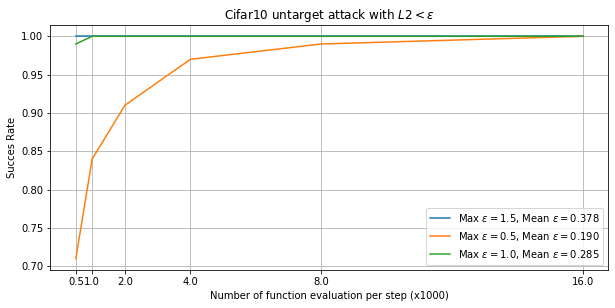

In [21]:
fig = plt.figure(figsize=(10, 4.5))
plt.title('Cifar10 untarget attack with $L2 < \epsilon$')
for eps in epsilon_list:
    c = CU2.Epsilon == eps
    mean_eps = CU2.MeanEpsilon[c].mean()
    plt.plot(CU2.NGradient[c], CU2.SuccesRate[c], label=r'Max $\epsilon = {}$, Mean $\epsilon = {:.3f}$'.format(eps, mean_eps))
plt.ylabel('Succes Rate')
plt.xlabel('Number of function evaluation per step (x1000)')
plt.xticks(n_gradient, np.array(n_gradient)/1000, rotation=0)
plt.legend()
plt.grid()
plt.show()

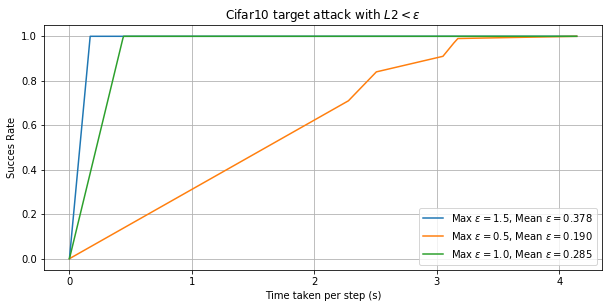

In [22]:
max_time = CU2.MeanTime.max()
def SR(df):
    return [0] + df.SuccesRate.tolist() + [df.SuccesRate.max()]
def Time(df):
    return sorted([0] + df.MeanTime.tolist() + [max_time])

fig = plt.figure(figsize=(10, 4.5))
plt.title('Cifar10 target attack with $L2 < \epsilon$')
for eps in epsilon_list:
    c = CU2.Epsilon == eps
    mean_eps = CU2.MeanEpsilon[c].mean()
    plt.plot(Time(CU2[c]), SR(CU2[c]), label=r'Max $\epsilon = {}$, Mean $\epsilon = {:.3f}$'.format(eps, mean_eps))
plt.ylabel('Succes Rate')
plt.xlabel('Time taken per step (s)')
plt.legend()
plt.grid()
plt.show()

**4. Target attack on Cifar with L2**

In [4]:
CT2 = pd.read_csv('CT2.csv', index_col=0)
print('MU2 has shape: {}'.format(CT2.shape))
epsilon_list = list(CT2.Epsilon.unique())
print('The upper bounds on the norm are:\n{}'.format(epsilon_list))
n_gradient = sorted(list(CT2.NGradient.unique()))
CT2.head()

MU2 has shape: (6, 14)
The upper bounds on the norm are:
[1.0]


,Optim,Data,Norm,Epsilon,Target,SuccesRate,MeanTime,MeanEpsilon,NGradient,BatchSize,Alpha,GaussianSmoothing,Nexample,Epochs
0,classic,cifar10,2,1.0,1,0.644444,8.528332,0.377812,500,-1,0.2,0.001,20,100
1,classic,cifar10,2,1.0,1,0.772222,5.037889,0.385440,1000,-1,0.2,0.001,20,100
2,classic,cifar10,2,1.0,1,0.927778,13.592496,0.393431,2000,-1,0.2,0.001,20,100
3,classic,cifar10,2,1.0,1,0.961111,8.253980,0.393210,4000,-1,0.2,0.001,20,100
4,classic,cifar10,2,1.0,1,0.983333,28.369831,0.394178,8000,4000,0.2,0.001,20,100


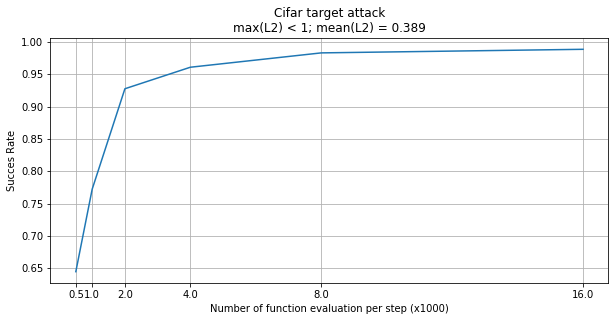

In [5]:
fig = plt.figure(figsize=(10, 4.5))
plt.title('Cifar target attack\nmax(L2) < 1; mean(L2) = {:.3f}'.format(CT2.MeanEpsilon.mean()))
plt.ylabel('Succes Rate')
plt.xlabel('Number of function evaluation per step (x1000)')
plt.plot(CT2.NGradient, CT2.SuccesRate)
plt.xticks(n_gradient, np.array(n_gradient)/1000, rotation=0)
plt.grid()
plt.show()